# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [5]:
#decided to follow suit with the tutorial and use these names instead 
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#dropping rows with no 4th grade reading score 
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

#similar to the tutorial, filling in enrollment estimates with count of students 
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: 4th grade reading scores 

How many years of data are logged in our dataset? 

In [7]:
print(df["YEAR"].nunique())
#14 years of data for 4th grade reading scores 


14


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [8]:
michigan = df[(df["STATE"] == "MICHIGAN")]
m_mean = michigan["AVG_READING_4_SCORE"].mean()
ohio = df[(df["STATE"] == "OHIO")]
o_mean = ohio["AVG_READING_4_SCORE"].mean()

if m_mean > o_mean:
    high_state = "Michigan"
    high_mean = m_mean
else:
    high_state = "Ohio"
    high_mean = o_mean
    
print(high_state, "has the higher average outcome score at ", high_mean)

Ohio has the higher average outcome score at  223.1818181818182


Find the average for your outcome score across all states in 2019

In [9]:
data2019 = df[df["YEAR"] == 2019]
print(data2019["AVG_READING_4_SCORE"].mean())

219.79245283018867


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [10]:
states = df.groupby("STATE")
states["AVG_READING_4_SCORE"].max()


STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
#creating a variable which shows the amount of intructural expenditure per student, thought it would be a relevant 
#variable to create 
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: I created an instruction expentidure per student variable to look at, because it would be a lot more useful to know how much is being invested per student. This makes sense because the populations of different states are very different, so spending less on expentidure doesn't mean they prioritize education less if they have a small population. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

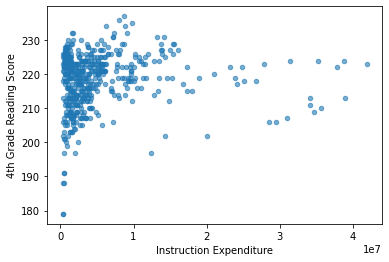

In [12]:
#first I'll check intruction expenditure 
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Reading Score')

#This data seems interesting, the expenditure doesn't necessarily correlate to higher scores, in fact, a lot of the high
#scores have the least amount of expentidure for instruction 

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

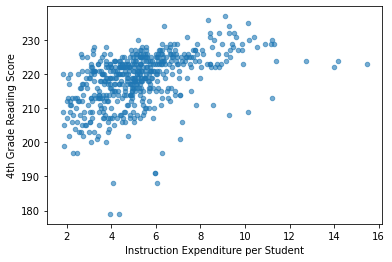

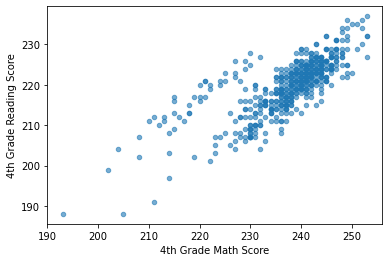

In [13]:
#now I'll check using the variable I created, instruction expenditure per student 
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('4th Grade Reading Score')

#this data seems more accurate, in terms of what I'd expect. In general, as the instruction expendiure per student increases,
#the 4th grade reading score also increases. There are some outliers where the state/year spent a lot per student
#but the outcome wasn't that high of a reading score 

#Now I'm going to check for another predictors 

df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('4th Grade Reading Score')

# there is a good correllation between the math and reading scores, there seem to be two lines which have a strong 
#positive correlation 

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# I'm going to pick intruction expenditure per student and 4th grade math score as my predictors 
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'AVG_MATH_4_SCORE', ]].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']


In [98]:
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
# create your model here
model = LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [103]:
print(model.intercept_)
print(model.coef_)

print('r^2:', model.score(X_test, y_test))
print('mean error:', np.mean(model.predict(X_test)-y_test))
print('mean absolute error:', np.mean(np.abs(model.predict(X_test)-y_test)))


82.99226658170684
[0.15901132 0.57300472]
r^2: 0.6262617962900925
mean error: 0.3997577043236911
mean absolute error: 3.8702284254305774


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

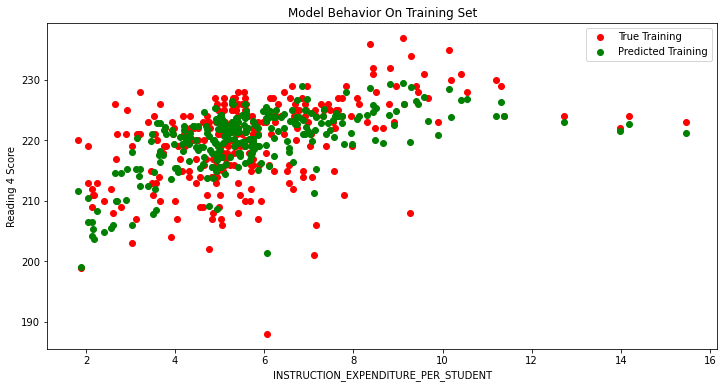

In [104]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

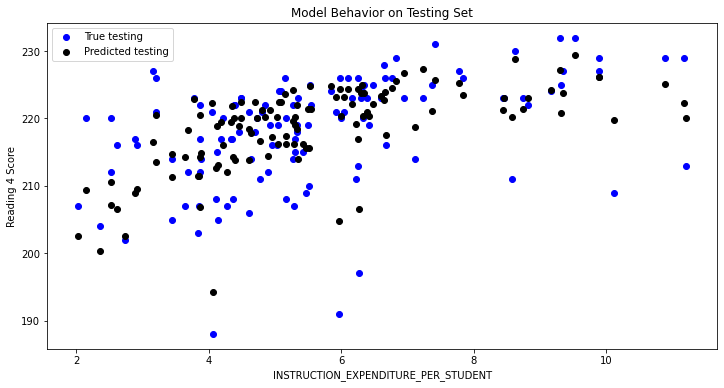

In [105]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I started this checkpoint by deciding to look at data for 4th grade reading score. I first decided to drop rows without scores for 4th grade reading during the data cleanup portion. After that, I looked at the data for 4th grade reading scores independently, and found that there were only 14 different years of data for this test. I checked individual state and year data, and (unfortunately) found that Ohio had a higher average 4th grade reading score than Michigan across the years. Afterwards, I was inspired by the tutorial to create my own variable, called Instructional Expenditure per Student, which I found by dividing the Instructional Expenditure by enrollment. After comparing Instructional Expenditure vs. 4th Grade Reading Score and Instructional Expenditure per Student vs. 4th Grade Reading Score, it was very clear why the second option makes more sense to look at, as number of students varies a lot across states. Finally, I decided to look at 4th Grade Math Scores and Instructional Expenditure per Student as my input features. For the visualization, I looked at how my feature, Instructional Expenditure per Student affected the model. 

Turns out the model did not work too well for the training and testing sets, though it looks like it did work better for the training set. I think a linear regression in general is not an accurate way to describe the relationship between these two variables, though despite that it looks like the model was able to find a shape that generally resembles the actual data. Looking at the visualizations and the evaluation sections, the model's performance was not very good. 

I would say student performance can indeed be predicted, and potentially can be predicted by how much money a state is investing in schools, however, I would say a simple linear regression may not be the best way to predict this relationship. 